In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import storage, translate

In [2]:
df = pd.read_csv('corpus_el.csv', sep=';')
df.head()

,year,date,category,title_en,link_en,text_en,length_en,title_el,text_el,length_el,link_el
0,2022,2022-04-14,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2022/h...,14 April 2022Russia’s aggression in Ukraine is...,899,Αποφάσεις νομισματικής πολιτικής,14 Απριλίου 2022Η επίθεση της Ρωσίας στην Ουκρ...,1070,https://www.ecb.europa.eu/press/pr/date/2022/h...
1,2022,2022-03-10,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2022/h...,10 March 2022 The Russian invasion of Ukraine ...,977,Αποφάσεις νομισματικής πολιτικής,10 Μαρτίου 2022 Η εισβολή της Ρωσίας στην Ουκρ...,1200,https://www.ecb.europa.eu/press/pr/date/2022/h...
2,2022,2022-03-02,PRESS RELEASE,Charity concert for Ukraine at Berlin State Opera,https://www.ecb.europa.eu/press/pr/date/2022/h...,2 March 2022 The European Central Bank (ECB) a...,227,Φιλανθρωπική συναυλία για την Ουκρανία στην Κρ...,2 Μαρτίου 2022 Η Ευρωπαϊκή Κεντρική Τράπεζα (Ε...,257,https://www.ecb.europa.eu/press/pr/date/2022/h...
3,2022,2022-02-17,PRESS RELEASE,Financial statements of the ECB for 2021,https://www.ecb.europa.eu/press/pr/date/2022/h...,17 February 2022 ECB profit €0.2 billion (202...,713,Οικονομικές καταστάσεις της ΕΚΤ για το 2021,17 Φεβρουαρίου 2022 Τα κέρδη της ΕΚΤ ανήλθαν ...,849,https://www.ecb.europa.eu/press/pr/date/2022/h...
4,2022,2022-02-17,ANNUAL ACCOUNTS,Annual Accounts 2021,https://www.ecb.europa.eu/pub/annual/annual-ac...,Key figures 1 Management report 1.1 Purpose o...,16183,Ετήσιοι λογαριασμοί της ΕΚΤ 2021,Βασικά στοιχεία 1 Έκθεση διαχείρισης 1.1 Σκοπ...,17353,https://www.ecb.europa.eu/pub/annual/annual-ac...


In [3]:
print(df.shape)
df = df[df['length_el'] > 0]
print(df.shape)

(679, 11)
(678, 11)


In [4]:
print(f"There are {df.shape[0]} Greek texts.")

There are 678 Greek texts.


In [5]:
int(df['text_el'].str.len().sum())

1699614

In [29]:
def translate_text(text, project_id='nettt-2022'):

    client = translate.TranslationServiceClient.from_service_account_json('../api/google-trans.json')
    location = 'global'
    parent = f'projects/{project_id}/locations/{location}'

    response = client.translate_text(
        request = {
            'parent': parent,
            'contents': [text],
            'mime_type': 'text/plain',
            'source_language_code': 'en',
            'target_language_code': 'el',
        },
        timeout=30
    )

    for translation in response.translations:
        return translation.translated_text

In [7]:
# df[['length_el']].idxmin()

In [33]:
df[['length_en']].idxmax()

length_en    21
dtype: int64

In [35]:
translate_text(df.iloc[21]['text_en'])

InvalidArgument: 400 Text is too long. [field_violations {
  field: "content"
  description: "Total text length: 105468 Maximum: 102400"
}
]

In [34]:
df.iloc[21]['text_en']

"Key figures  1 Management report 1.1 Purpose of the ECB’s management report The management report[1] is an integral part of the ECB’s Annual Accounts and is designed to provide readers with contextual information related to the financial statements.[2] Given that the ECB’s activities and operations are undertaken in support of its policy objectives, the ECB’s financial position and result should be viewed in conjunction with its policy actions. To this end, the management report presents the ECB’s main tasks and activities, as well as their impact on its financial statements. Furthermore, it analyses the main developments in the Balance Sheet and the Profit and Loss Account during the year and includes information on the ECB’s financial resources. Finally, it describes the risk environment in which the ECB operates, providing information on the specific risks to which the ECB is exposed, and the risk management policies used to mitigate risks. 1.2 Main tasks and activities The ECB is 

In [8]:
# df.iloc[662]['text_en']

In [21]:
df_a = df.iloc[:int(df.shape[0]/2)]
df_b = df.iloc[int(df.shape[0]/2):]

df_a.shape, df_b.shape

((339, 11), (339, 11))

In [43]:
df_a['text_en'].str.len().idxmax()

4

In [45]:
df_a.drop(df_a.index[df_a['text_en'].str.len().idxmax()], inplace=True)
df_a.shape

C:\Program Files\Python38\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(338, 11)

In [51]:
largest_10_idx = list(df_a.nlargest(10, 'length_en').index)
df_a.shape
df_a.drop(largest_10_idx, inplace=True)
df_a.shape

C:\Program Files\Python38\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(328, 11)

In [52]:
df_a['google_nmt'] = df_a['text_en'].apply(translate_text)
df_a['length_google'] = df_a['google_nmt'].apply(lambda x: len(x.split()))

<ipython-input-52-a5f3f805e02d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['google_nmt'] = df_a['text_en'].apply(translate_text)
<ipython-input-52-a5f3f805e02d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['length_google'] = df_a['google_nmt'].apply(lambda x: len(x.split()))


In [53]:
df_a.sample(10)

,year,date,category,title_en,link_en,text_en,length_en,title_el,text_el,length_el,link_el,google_nmt,length_google
86,2017,2017-07-20,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2017/h...,At today’s meeting the Governing Council of th...,211,Αποφάσεις νομισματικής πολιτικής,"Κατά τη σημερινή του συνεδρίαση, το Διοικητικό...",258,https://www.ecb.europa.eu/press/pr/date/2017/h...,Στη σημερινή συνεδρίαση το Διοικητικό Συμβούλι...,218
295,2010,2010-08-05,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2010/h...,At today’s meeting the Governing Council of th...,64,Αποφάσεις νομισματικής πολιτικής,Κατά τη σημερινή του συνεδρίαση το Διοικητικό ...,88,https://www.ecb.europa.eu/press/pr/date/2010/h...,Στη σημερινή συνεδρίασή του το Διοικητικό Συμβ...,61
3,2022,2022-02-17,PRESS RELEASE,Financial statements of the ECB for 2021,https://www.ecb.europa.eu/press/pr/date/2022/h...,17 February 2022 ECB profit €0.2 billion (202...,713,Οικονομικές καταστάσεις της ΕΚΤ για το 2021,17 Φεβρουαρίου 2022 Τα κέρδη της ΕΚΤ ανήλθαν ...,849,https://www.ecb.europa.eu/press/pr/date/2022/h...,"17 Φεβρουαρίου 2022 Κέρδη ΕΚΤ 0,2 δισ. ευρώ (2...",793
91,2017,2017-03-28,PRESS RELEASE,ECB welcomes dialogue with NGOs on transparency,https://www.ecb.europa.eu/press/pr/date/2017/h...,Non-governmental organisation commends ECB for...,332,Η ΕΚΤ καλωσορίζει τον διάλογο με μη κυβερνητικ...,Μη κυβερνητική οργάνωση επαινεί την ΕΚΤ για τα...,392,https://www.ecb.europa.eu/press/pr/date/2017/h...,Μη κυβερνητικός οργανισμός επαινεί την ΕΚΤ για...,371
20,2021,2021-02-18,PRESS RELEASE,Financial statements of the ECB for 2020,https://www.ecb.europa.eu/press/pr/date/2021/h...,18 February 2021 ECB profit amounted to €1.6 ...,804,Οικονομικές καταστάσεις της ΕΚΤ για το 2020,18 Φεβρουαρίου 2021 Τα κέρδη της ΕΚΤ ανήλθαν ...,929,https://www.ecb.europa.eu/press/pr/date/2021/h...,Στις 18 Φεβρουαρίου 2021 τα κέρδη της ΕΚΤ ανήλ...,878
330,2009,2009-03-05,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2009/h...,At today’s meeting the Governing Council of th...,38,Αποφάσεις νομισματικής πολιτικής,"Κατά τη σημερινή του συνεδρίαση, το Διοικητικό...",61,https://www.ecb.europa.eu/press/pr/date/2009/h...,"Στη σημερινή συνεδρίαση, το Διοικητικό Συμβούλ...",39
159,2014,2014-08-08,PRESS RELEASE,ECB publishes Comprehensive Assessment Stress ...,https://www.ecb.europa.eu/press/pr/date/2014/h...,EMBARGOTransmission embargo until 11.30 a.m. C...,455,Η ΕΚΤ δημοσιεύει εγχειρίδιο για την άσκηση προ...,EMBARGOΑπαγόρευση δημοσίευσης πριν από τις 11....,581,https://www.ecb.europa.eu/press/pr/date/2014/h...,Εμπάργκο μετάδοσης EMBARGOT έως τις 11.30 π.μ....,496
82,2017,2017-12-14,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2017/h...,At today’s meeting the Governing Council of th...,252,Αποφάσεις νομισματικής πολιτικής,Κατά τη σημερινή του συνεδρίαση το Διοικητικό ...,294,https://www.ecb.europa.eu/press/pr/date/2017/h...,Στη σημερινή συνεδρίαση το Διοικητικό Συμβούλι...,262
36,2020,2020-04-30,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2020/h...,At today’s meeting the Governing Council of th...,664,Αποφάσεις νομισματικής πολιτικής,"Κατά τη σημερινή του συνεδρίαση, το Διοικητικό...",794,https://www.ecb.europa.eu/press/pr/date/2020/h...,"Στη σημερινή του συνεδρίαση, το Διοικητικό Συμ...",692
126,2015,2015-07-17,PRESS RELEASE,Biannual information on euro banknote counterf...,https://www.ecb.europa.eu/press/pr/date/2015/h...,Decline in euro banknote counterfeits in first...,518,Εξαμηνιαίο ενημερωτικό δελτίο σχετικά με την π...,Τα πλαστά τραπεζογραμμάτια ευρώ μειώθηκαν το π...,628,https://www.ecb.europa.eu/press/pr/date/2015/h...,Μείωση των πλαστών τραπεζογραμματίων ευρώ το π...,563


In [58]:
df_b.drop(df_b.index[df_b['text_en'].str.len().idxmax() - 339], inplace=True)
df_b.shape

C:\Program Files\Python38\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(338, 11)

In [59]:
largest_10_idx = list(df_b.nlargest(10, 'length_en').index)
df_b.shape
df_b.drop(largest_10_idx, inplace=True)
df_b.shape

C:\Program Files\Python38\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(328, 11)

In [60]:
df_b['google_nmt'] = df_b['text_en'].apply(translate_text)
df_b['length_google'] = df_b['google_nmt'].apply(lambda x: len(x.split()))

<ipython-input-60-8daf7a5f49a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['google_nmt'] = df_b['text_en'].apply(translate_text)
<ipython-input-60-8daf7a5f49a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['length_google'] = df_b['google_nmt'].apply(lambda x: len(x.split()))


In [61]:
df_ = pd.concat([df_a, df_b], ignore_index=True).sort_values(by='date', ascending=False)
df_.shape

(656, 13)

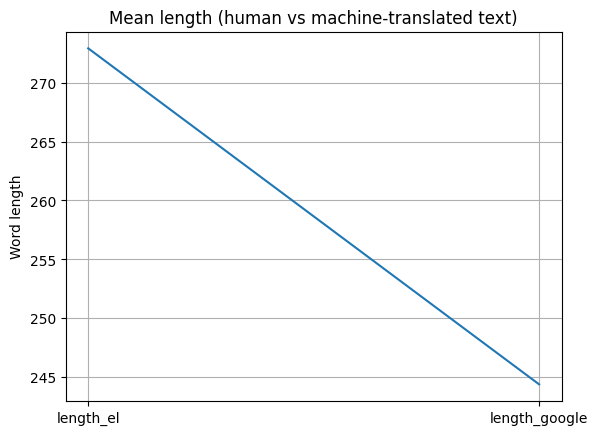

In [66]:
plt.plot(df_[['length_el', 'length_google']].mean())
plt.title('Mean length (human vs machine-translated text)')
plt.ylabel('Word length')
plt.grid()
plt.show()

In [64]:
df_.sample(5)

,year,date,category,title_en,link_en,text_en,length_en,title_el,text_el,length_el,link_el,google_nmt,length_google
165,2014,2014-06-05,PRESS RELEASE,ECB announces monetary policy measures to enha...,https://www.ecb.europa.eu/press/pr/date/2014/h...,"In pursuing its price stability mandate, the G...",647,Η ΕΚΤ ανακοινώνει μέτρα νομισματικής πολιτικής...,Στο πλαίσιο της επιδίωξης της αποστολής του να...,779,https://www.ecb.europa.eu/press/pr/date/2014/h...,Κατά την εκτέλεση της εντολής του για τη σταθε...,698
511,2003,2003-08-01,PRESS RELEASE,Publication of the indicative calendar for the...,https://www.ecb.europa.eu/press/pr/date/2003/h...,The European Central Bank (ECB) is today publi...,158,� ΑΡΑΡΤΗΜΑ 1. � ρακτικές πληροφορίες σχετικά μ...,- Μεταβατική περίοδος τήρησης των ελάχιστων υπ...,879,https://www.ecb.europa.eu/press/pr/date/2003/h...,Η Ευρωπαϊκή Κεντρική Τράπεζα (ΕΚΤ) δημοσιεύει ...,164
338,2008,2008-09-04,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2008/h...,At today’s meeting the Governing Council of th...,65,Αποφάσεις νομισματικής πολιτικής,"Κατά τη σημερινή του συνεδρίαση, το Διοικητικό...",87,https://www.ecb.europa.eu/press/pr/date/2008/h...,Στη σημερινή συνεδρίασή του το Διοικητικό Συμβ...,65
296,2010,2010-03-04,PRESS RELEASE,Annual Accounts of the European Central Bank f...,https://www.ecb.europa.eu/press/pr/date/2010/h...,The Governing Council of the European Central ...,903,Ετήσιοι λογαριασμοί της Ευρωπαϊκής Κεντρικής Τ...,Το Διοικητικό Συμβούλιο της Ευρωπαϊκής Κεντρικ...,953,https://www.ecb.europa.eu/press/pr/date/2010/h...,Το Διοικητικό Συμβούλιο της Ευρωπαϊκής Κεντρικ...,916
595,2001,2001-03-29,MONETARY POLICY DECISION,Monetary policy decisions,https://www.ecb.europa.eu/press/pr/date/2001/h...,At today's meeting the Governing Council of th...,42,Αποφάσεις νομισματικής πολιτικής,"Κατά τη σημερινή του συνεδρίαση, το Διοικητικό...",58,https://www.ecb.europa.eu/press/pr/date/2001/h...,Στη σημερινή συνεδρίασή του το Διοικητικό Συμβ...,40


In [65]:
df_.to_csv('corpus_el_google.csv', sep=';', index=False)